# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS2

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [2]:
Spectrum("ObsID0945020137_SRCNUM21_EMOS2_spectrum_grp.fits")

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS2_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.573e-03 +/- 5.262e-04 (56.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.822e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.822e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS2.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
#Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 861.5, 665.5, -0.5)

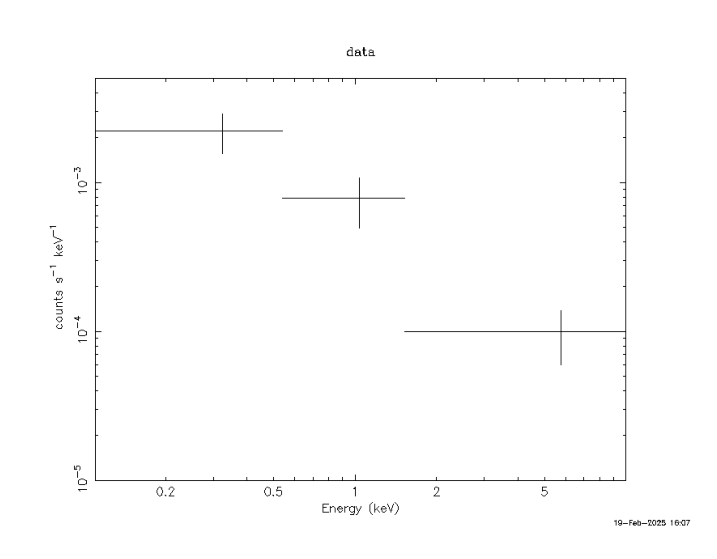

In [4]:
source = "ObsID0945020137_SRCNUM21_EMOS2"
img = plt.imread(source+"_Spectrum.png")
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              2.728586e+12     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


1.47642e-06
16.7049      76276.5       0   1.14247e-07       3.02669   1.47491e-06
16.7031      74461.6       0   3.36354e-08       3.02353   1.47326e-06
16.7013      72942.7       0   1.35276e-08       3.02048   1.47149e-06
16.6997      71666.5       0   3.49349e-09       3.01753   1.46962e-06
16.6982      70601.1       0   9.89392e-10       3.01465   1.46768e-06
16.6968      69710.7       0   3.64382e-10       3.01184   1.46566e-06
16.6955      68967.8       0   5.23634e-11       3.00909   1.46359e-06
16.6942      68350.5       0   1.34383e-11       3.00638   1.46146e-06
16.6929      67845.6       0   3.64215e-12       3.00369   1.45931e-06
16.6917      67388.8       0   1.24506e-12       3.00106   1.45710e-06
16.6906      67066.2       0   6.12790e-14       2.99845   1.45486e-06
16.6898      66811.8       0   6.89053e-15       2.99617   1.45231e-06
16.6888      67289.4       0   1.86441e-15       2.99367   1.44983e-06
16.6835      67447.3       0   5.98846e-16       2.98732   1.4510

(-0.5, 866.5, 664.5, -0.5)

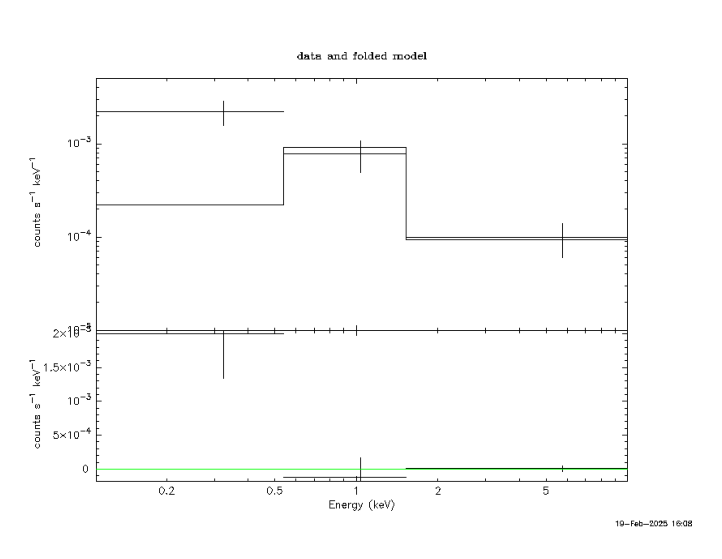

In [6]:
img = plt.imread(source+"_Spectrum_bbody.png")
plt.imshow(img)
plt.axis('off')

### bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.027270e+11     using 3 bins.

Test statistic : Chi-Squared              1.027270e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
12.6124      0.58264      -3      0.261455       1.04651   1.28364e-05
10.3806      85058.8      -4      0.125140       11.1243   5.55225e-06
7.89947      150492        0     0.0443371       4.86022   5.72884e-06
6.60271      149012        

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 860.5, 662.5, -0.5)

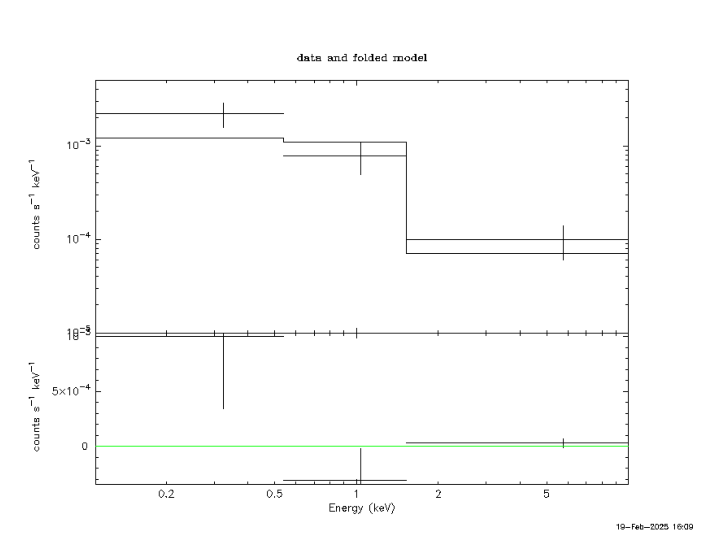

In [8]:
img = plt.imread(source+"_Spectrum_bremss.png")
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.180456e+10     using 3 bins.

Test statistic : Chi-Squared              1.180456e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
11.1961      0.868812     -2       1.10615       1.37808   3.62415e-05
10.895       14

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 861.5, 666.5, -0.5)

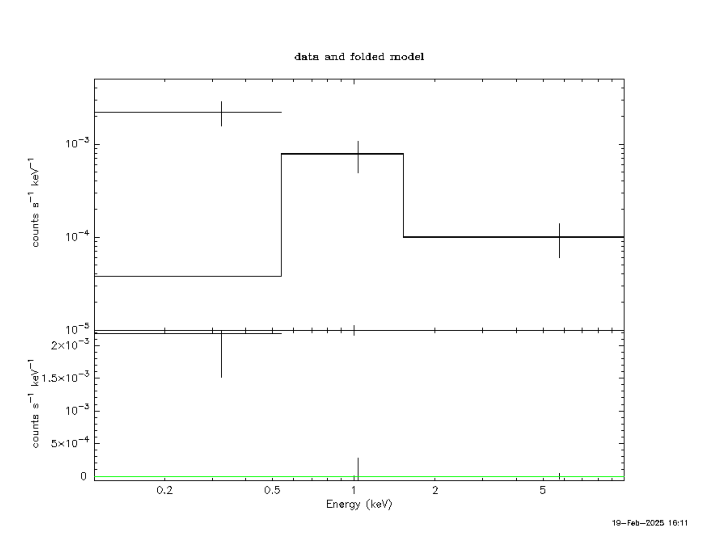

In [10]:
img = plt.imread(source+"_Spectrum_apec.png")
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.165339e+11     using 3 bins.

Test statistic : Chi-Squared              7.165339e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
16.0002      0.479258     -3      0.457343       1.78176   3.34735e-06
10.4373      317467       -1      0.167281       1.58317   4.36977e-06
10.2807      193906       -1     0.0571981       1.40559   2.95604e-06
6.57097      422503      

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 859.5, 664.5, -0.5)

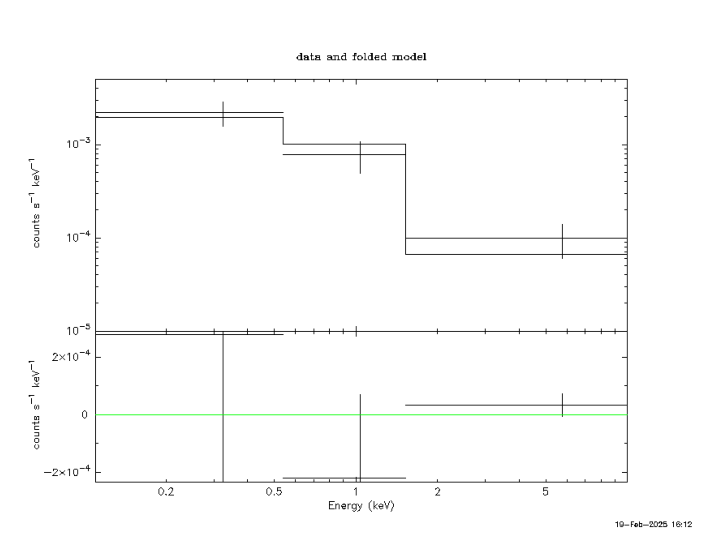

In [12]:
img = plt.imread(source+"_Spectrum_powerlaw.png")
plt.imshow(img)
plt.axis('off')

## Flux

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.6698e-05 photons (3.1601e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
Flux = 3.1601e-14 # ergs/cm^2/s

### Luminosité
Aucune distance n'est diponible sur ESASky.

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"